In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#file_path = 'colposition/schema_matching_precolposition_gdc_results_20240725153030.csv'
file_path = 'colposition/schema_matching_precolposition_gdc_results_new_method.csv'

df = pd.read_csv(file_path)
df

,Matcher,Source File,Target File,Source Column,Target Column,Data Type,Target Column Index
0,ContrastiveLearning,Krug.csv,gdc_table.csv,Sample.ID,submitter_id,string,13
1,ContrastiveLearning,Krug.csv,gdc_table.csv,Tumor.Stage,ajcc_pathologic_stage,string,4
2,ContrastiveLearning,Krug.csv,gdc_table.csv,Age.in.Month,age_at_diagnosis,string,0
3,ContrastiveLearning,Krug.csv,gdc_table.csv,Gender,gender,string,0
4,ContrastiveLearning,Krug.csv,gdc_table.csv,Ethnicity,ethnicity,string,0
...,...,...,...,...,...,...,...
670,ISResMat,Gilette.csv,gdc_table.csv,Cigarettes.per.Day,cigarettes_per_day,string,22
671,ISResMat,Gilette.csv,gdc_table.csv,Pack.Years.Smoked,pack_years_smoked,string,75
672,ISResMat,Gilette.csv,gdc_table.csv,Smoking.History,tobacco_smoking_status,string,59
673,ISResMat,Gilette.csv,gdc_table.csv,Secondhand.Smoke,secondhand_smoke_as_child,string,593


In [2]:
def calculate_mrr_per_method(df):

    # df = df[df['Target Column Index'] != -1]

    df['Reciprocal Rank'] = df['Target Column Index'].apply(
        lambda x: 1 / (x + 1) if x >= 0 else 0)
    
    # print(df['Reciprocal Rank'])
    


    # Group by the 'Matcher' column and calculate MRR for each group
    mrr_per_method = df.groupby('Matcher')['Reciprocal Rank'].mean()

    return mrr_per_method

In [3]:
df = pd.read_csv(file_path)
mrr_per_method = calculate_mrr_per_method(df)

# Print MRR for each method
for method, mrr in mrr_per_method.items():
    print(f"Matcher: {method}, Mean Reciprocal Rank (MRR): {mrr:.4f}")

Matcher: ContrastiveLearning, Mean Reciprocal Rank (MRR): 0.5850
Matcher: FineTunedEmbedRetrieveAlign, Mean Reciprocal Rank (MRR): 0.5572
Matcher: ISResMat, Mean Reciprocal Rank (MRR): 0.2111
Matcher: IndexedSimilarity, Mean Reciprocal Rank (MRR): 0.7379
Matcher: MPNetEmbedRetrieveAlign, Mean Reciprocal Rank (MRR): 0.5457


## Plotting column index at the topk

In [4]:
def plot(df, method):
    # df = df[df['Data Type'] == 'numeric']

    df['Source File'] = df['Source File'].str.replace('.csv', '')
    # Define the method

    # Combine 'Source File' and 'Source Column' into a single column for the x-axis labels
    df['Source'] = df['Source File'] + ' - ' + df['Source Column']
    # Sort by 'Target Column Index'
    df_sorted = df.sort_values('Target Column Index')
    # Set the plot style
    sns.set_style("ticks")
    # Create the figure with an even wider size
    plt.figure(figsize=(30, 10))  # Increased width from 20 to 24
    # Create the bar plot with even wider bars
    ax = sns.barplot(x='Source', y='Target Column Index', data=df_sorted, hue='Source', legend=False, palette='viridis', width=0.9)  # Increased width from 0.8 to 0.9
    # Highlight bars where 'Target Column Index' is -1
    for p, target_index, label in zip(ax.patches, df_sorted['Target Column Index'], df_sorted['Source']):
        if target_index == -1:
            # Add a light red background patch
            p.set_facecolor('lightcoral')
            p.set_edgecolor('black')
            p.set_linewidth(1)
            # Annotate with red text at the bottom
            ax.annotate(label,
                        (p.get_x() + p.get_width() / 2., 0),
                        ha='center', va='bottom',
                        xytext=(0, 10),  # Increased y-offset from 10 to 20
                        textcoords='offset points',
                        rotation=90, fontsize=12, color='red')
        elif target_index == 0:
                # Annotate with black text at the bottom
            ax.annotate(label,
                        (p.get_x() + p.get_width() / 2., 0),
                        ha='center', va='bottom',
                        xytext=(0, 40),  # Increased y-offset from 10 to 20
                        textcoords='offset points',
                        rotation=90, fontsize=12, color='blue')
        else:
            # Annotate with black text at the bottom
            ax.annotate(label,
                        (p.get_x() + p.get_width() / 2., 0),
                        ha='center', va='bottom',
                        xytext=(0, 40),  # Increased y-offset from 10 to 20
                        textcoords='offset points',
                        rotation=90, fontsize=12, color='black')
            


    # title = ''
    # ax.set_title(f'{title}', loc='left', x=0.25, y=0.5)
    # Rotate the x-axis labels for better readability
    ax.set_xticklabels([])
    # Add a horizontal line at y=0 for reference
    ax.axhline(0, color='gray', linewidth=0.8)
    # Remove default axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title(f'{method}', fontsize=28, x=0.5, y=.9)

    # ax.grid(False)
    sns.despine()


    # Add custom labels outside the figure
    plt.xlabel('Source Column', fontsize=22 )
    plt.ylabel('Position at the TopK matches', fontsize=22 )
    # Adjust layout
    plt.tight_layout()
    fig_name = f'index_pos_distribution_{method}.pdf'
    plt.savefig(fig_name, dpi=300)
    plt.show()
    # Save the figure as a PDF with high resolution


Target Column Index
 0      43.7%
 1     15.56%
 4      7.41%
 2      6.67%
 3      5.93%
-1      2.96%
 5      2.96%
 6      2.22%
 7      2.22%
 8      1.48%
 12     1.48%
 9      1.48%
 10     1.48%
 13     0.74%
 59     0.74%
 18     0.74%
 67     0.74%
 17     0.74%
 30     0.74%
Name: proportion, dtype: object


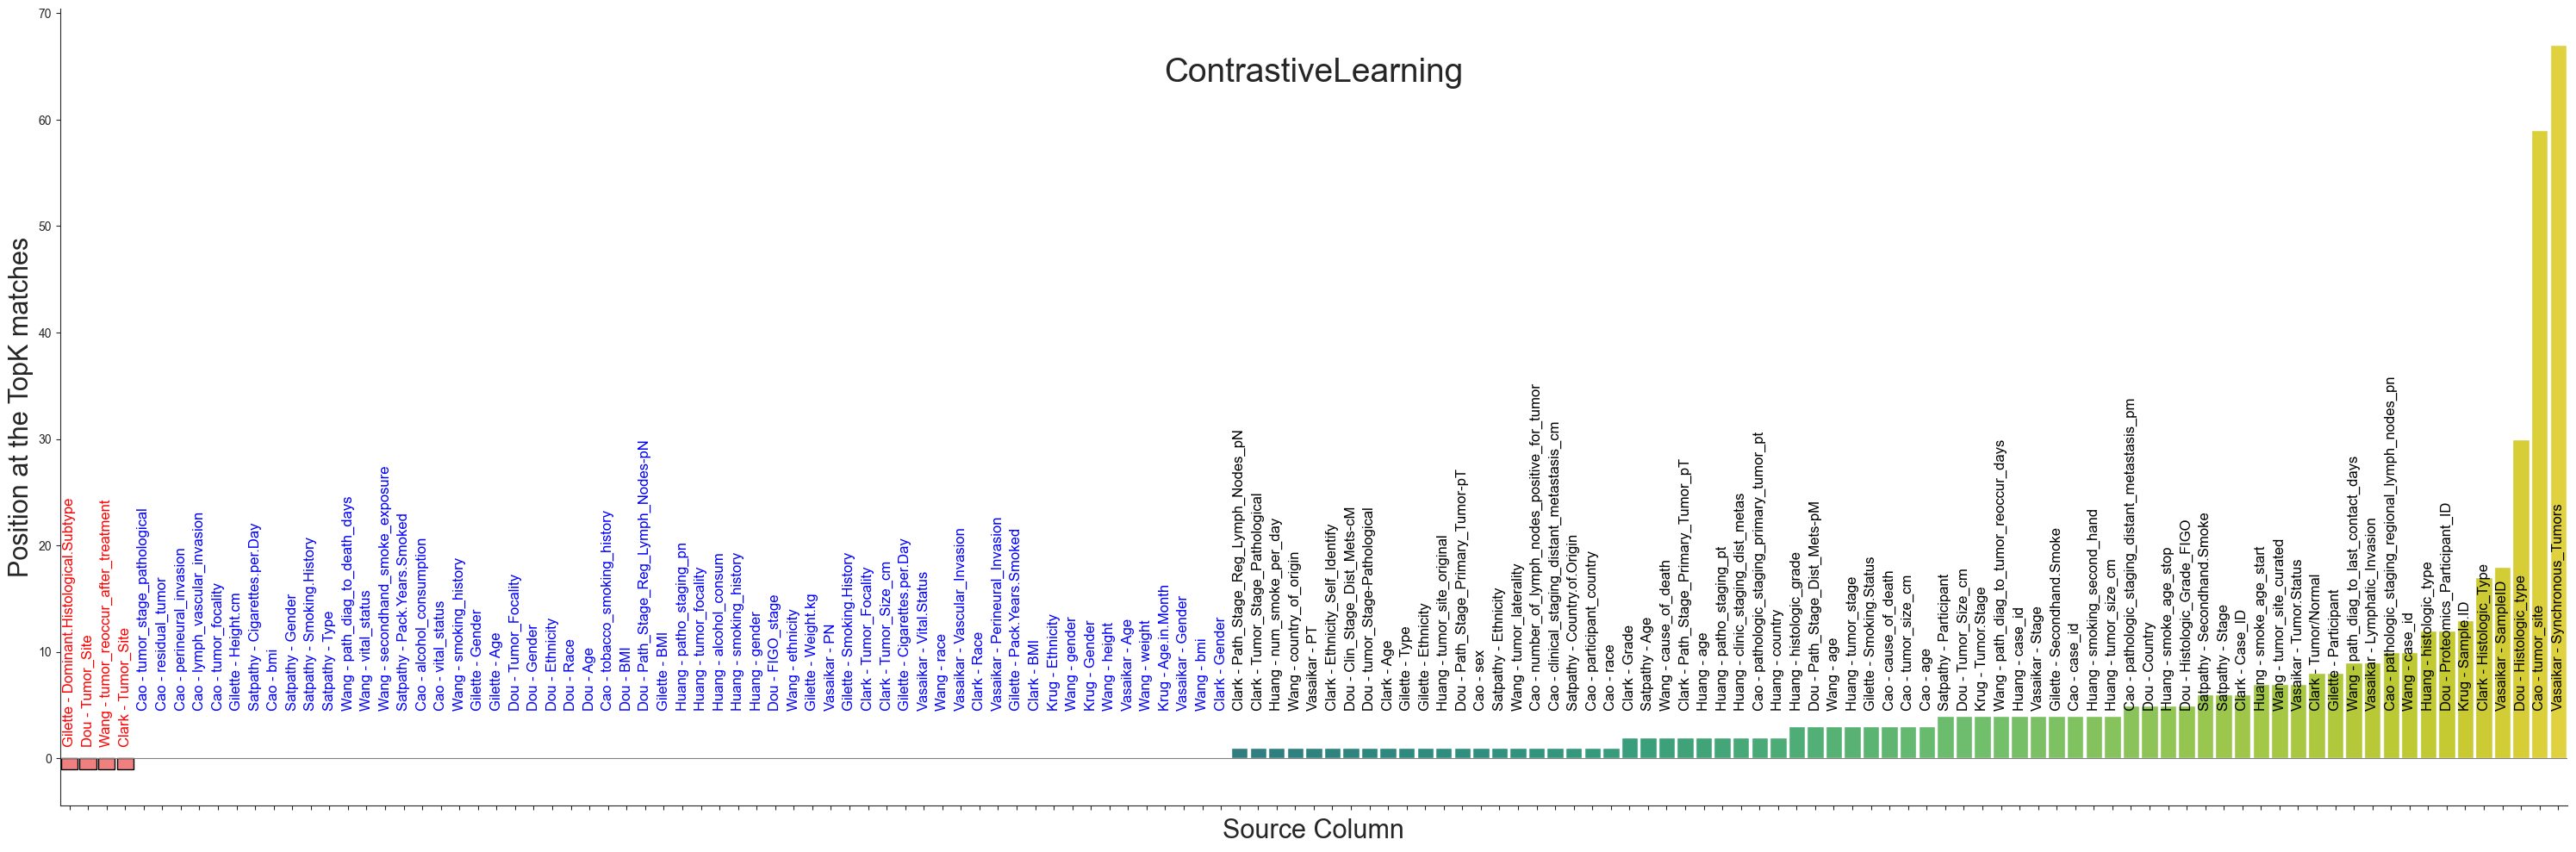

In [5]:
df = pd.read_csv(file_path)
method = 'ContrastiveLearning'
df = df[df['Matcher'] == method]
target_column_stats = df['Target Column Index'].value_counts(normalize=True) * 100
contrastive_target_column_stats = target_column_stats.round(2).astype(str) + '%'
print(contrastive_target_column_stats)
plot(df, method)


Target Column Index
 0     62.96%
 1     15.56%
-1       3.7%
 6      2.96%
 3      2.96%
 4      2.96%
 2      2.22%
 5      1.48%
 12     1.48%
 16     0.74%
 15     0.74%
 11     0.74%
 29     0.74%
 38     0.74%
Name: proportion, dtype: object


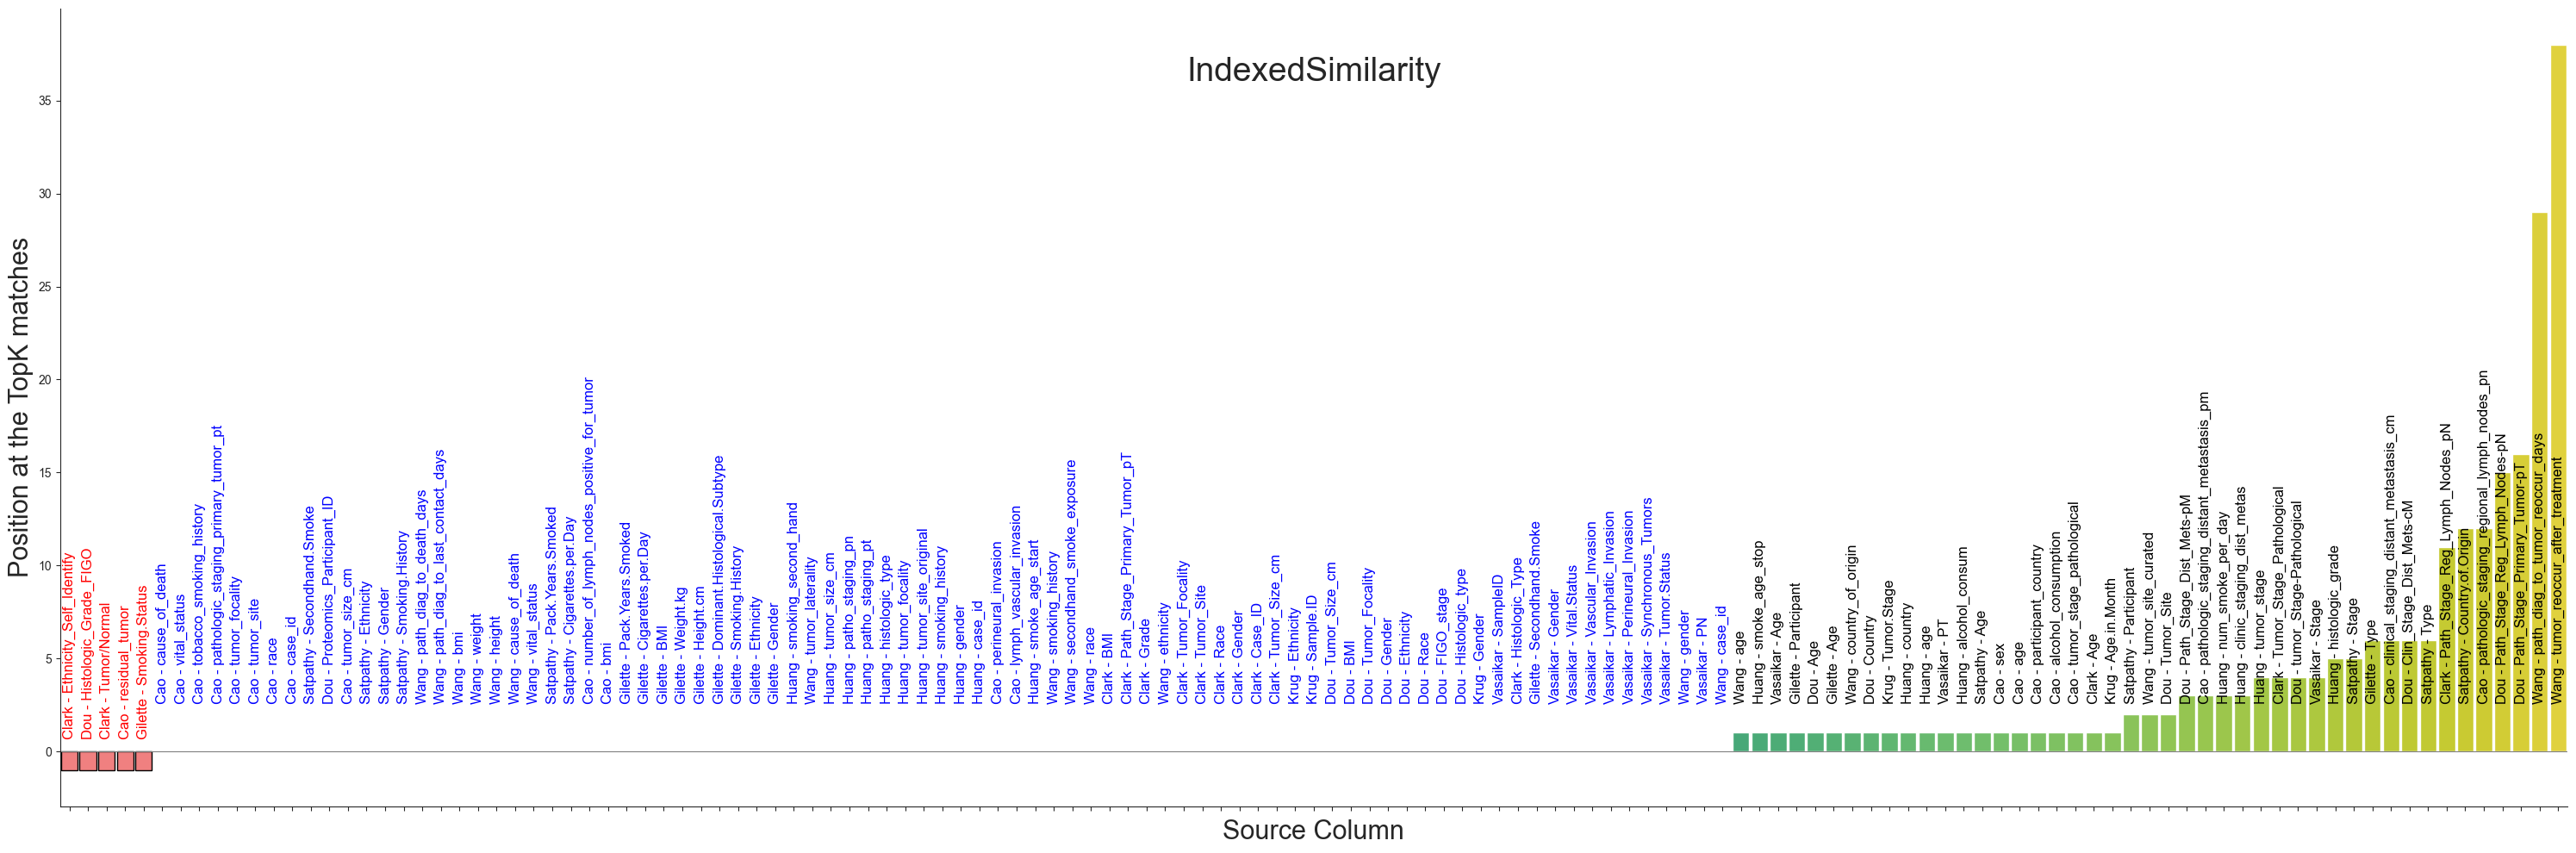

In [6]:
df = pd.read_csv(file_path)
method = 'IndexedSimilarity'
df = df[df['Matcher'] == method]
target_column_stats = df['Target Column Index'].value_counts(normalize=True) * 100
indexedsimilarity_target_column_stats = target_column_stats.round(2).astype(str) + '%'
print(indexedsimilarity_target_column_stats)
plot(df, method)

Target Column Index
0      15.56%
5       2.96%
1       2.96%
2       2.22%
7       2.22%
        ...  
508     0.74%
49      0.74%
113     0.74%
167     0.74%
52      0.74%
Name: proportion, Length: 87, dtype: object


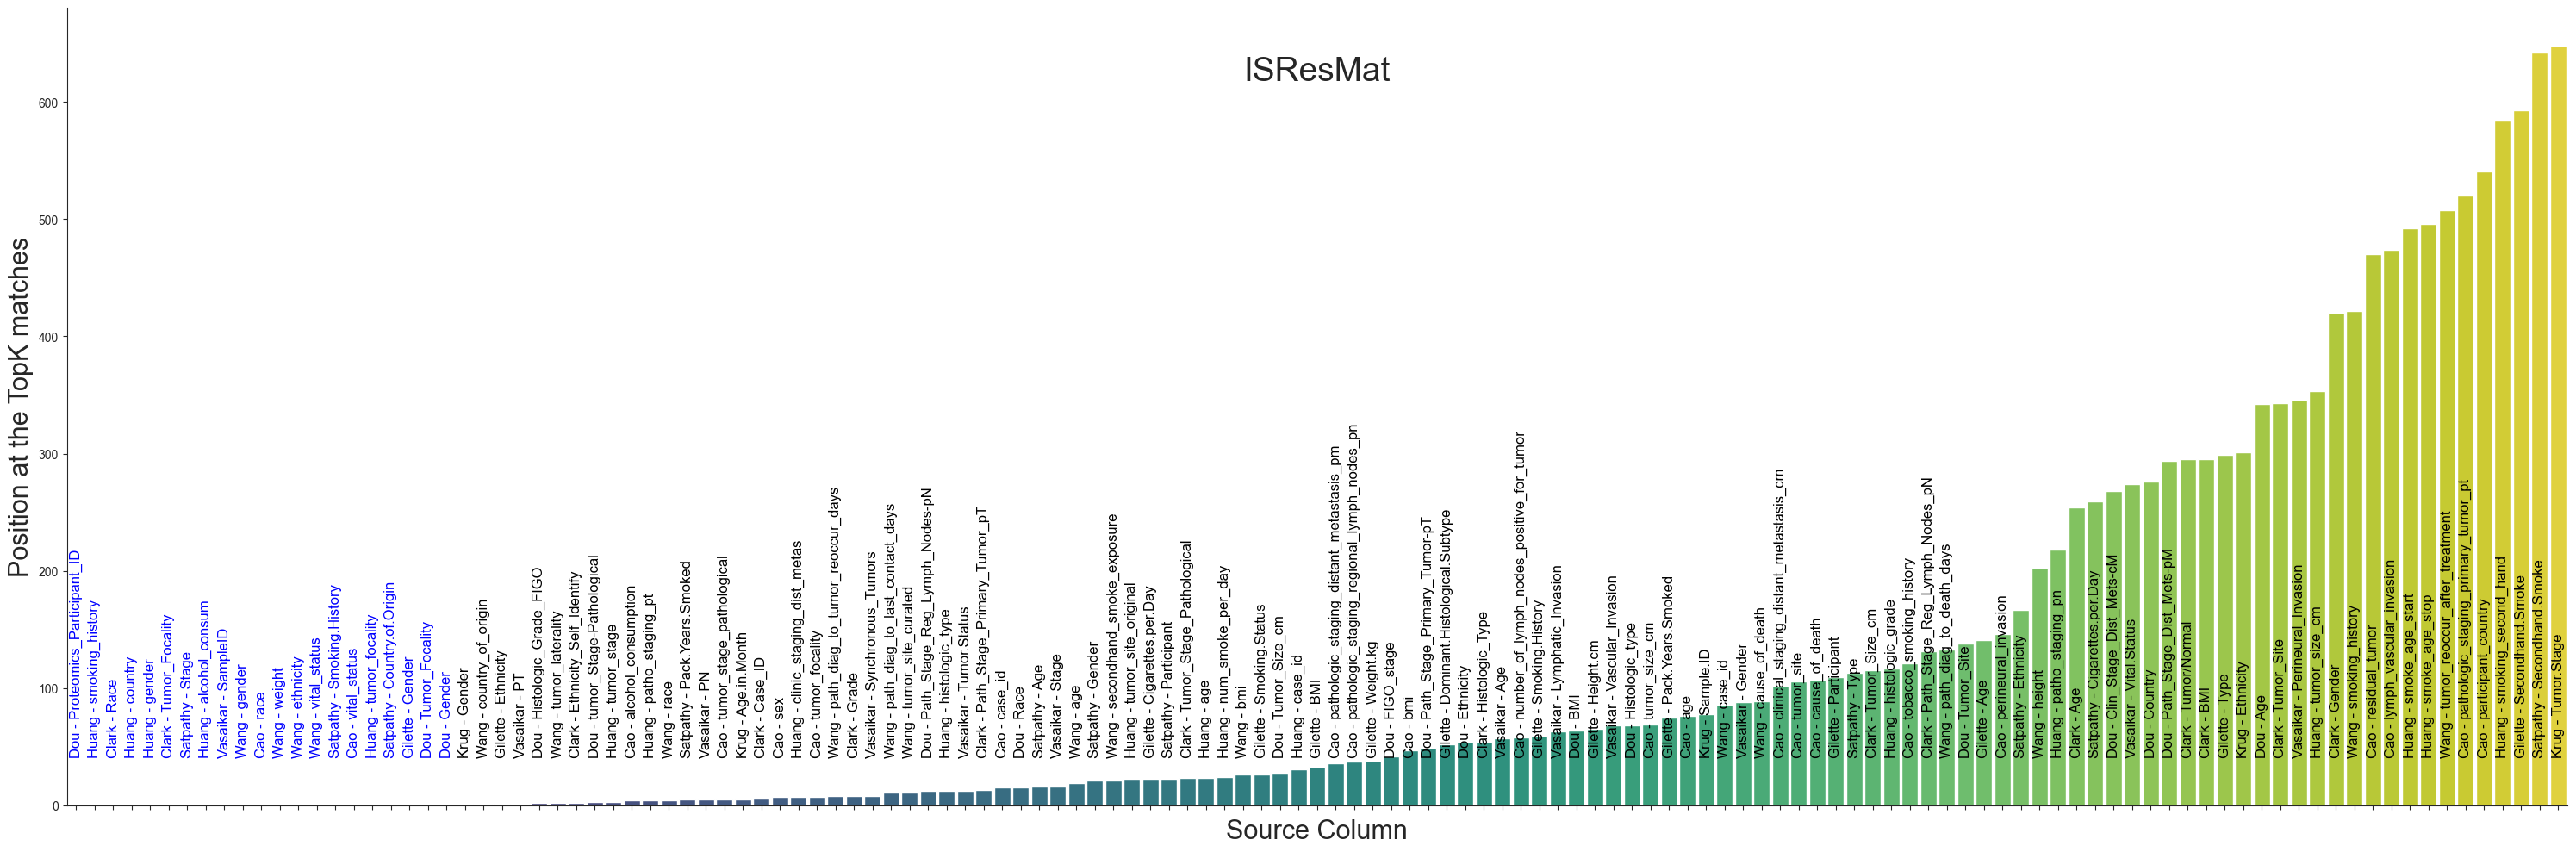

In [8]:
df = pd.read_csv(file_path)
method = 'ISResMat'
df = df[df['Matcher'] == method]
target_column_stats = df['Target Column Index'].value_counts(normalize=True) * 100
indexedsimilarity_target_column_stats = target_column_stats.round(2).astype(str) + '%'
print(indexedsimilarity_target_column_stats)
plot(df, method)

In [7]:
import tabulate




indexedsimilarity_df = pd.DataFrame({'IndexedSimilarity': indexedsimilarity_target_column_stats})


contrastive_df = pd.DataFrame({'ContrastiveLearning': contrastive_target_column_stats})


table = pd.concat([indexedsimilarity_df, contrastive_df], axis=1)


table = table.fillna(0)


table = table.sort_values('Target Column Index', ascending=True)


table_list = table.reset_index().values.tolist()
latex_table = tabulate.tabulate(table_list, headers=table.columns, tablefmt="latex")
print(latex_table)

# table

\begin{tabular}{rll}
\hline
    & IndexedSimilarity   & ContrastiveLearning   \\
\hline
 -1 & 3.7\%                & 2.96\%                 \\
  0 & 62.96\%              & 43.7\%                 \\
  1 & 15.56\%              & 15.56\%                \\
  2 & 2.22\%               & 6.67\%                 \\
  3 & 2.96\%               & 5.93\%                 \\
  4 & 2.96\%               & 7.41\%                 \\
  5 & 1.48\%               & 2.96\%                 \\
  6 & 2.96\%               & 2.22\%                 \\
  7 & 0                   & 2.22\%                 \\
  8 & 0                   & 1.48\%                 \\
  9 & 0                   & 1.48\%                 \\
 10 & 0                   & 1.48\%                 \\
 11 & 0.74\%               & 0                     \\
 12 & 1.48\%               & 1.48\%                 \\
 13 & 0                   & 0.74\%                 \\
 15 & 0.74\%               & 0                     \\
 16 & 0.74\%               & 0         